In [1]:
from os import listdir
from matplotlib import image
import random
import numpy as np 
from dataclasses import dataclass

# load images in a directory 
random.seed(1)
random_indexes = random.sample(range(25000), 250)
loaded_images = list()
for i in range(250):
	# load image
	filename = 'im' + str(random_indexes[i]) + '.jpg'
	img_data = image.imread('Q:/mirflickr25k/mirflickr/' + filename)
	# store loaded image
	loaded_images.append(img_data)
	print('> loaded %s %s' % (filename, img_data.shape))

> loaded im4402.jpg (248, 500, 3)
> loaded im18651.jpg (333, 500, 3)
> loaded im2067.jpg (500, 333, 3)
> loaded im8358.jpg (333, 500, 3)
> loaded im3863.jpg (333, 500, 3)
> loaded im16234.jpg (500, 500, 3)
> loaded im24935.jpg (500, 331, 3)
> loaded im14728.jpg (333, 500, 3)
> loaded im15474.jpg (375, 500, 3)
> loaded im21351.jpg (500, 375, 3)
> loaded im12439.jpg (367, 500, 3)
> loaded im6879.jpg (500, 445, 3)
> loaded im3075.jpg (333, 500, 3)
> loaded im15986.jpg (338, 450, 3)
> loaded im928.jpg (332, 500, 3)
> loaded im12773.jpg (500, 493, 3)
> loaded im14180.jpg (333, 500, 3)
> loaded im19904.jpg (333, 500, 3)
> loaded im24978.jpg (352, 500, 3)
> loaded im69.jpg (377, 500, 3)
> loaded im22801.jpg (500, 352, 3)
> loaded im14594.jpg (334, 500, 3)
> loaded im8727.jpg (375, 500, 3)
> loaded im23643.jpg (363, 500, 3)
> loaded im7496.jpg (333, 500, 3)
> loaded im19370.jpg (310, 500, 3)
> loaded im3349.jpg (375, 500, 3)
> loaded im10401.jpg (375, 500, 3)
> loaded im1002.jpg (326, 500, 3)


In [2]:
values = np.zeros((3, 256))
index = 0
for image in loaded_images:
	for i in range(image.shape[0]):
		for j in range(image.shape[1]):
			values[0][image[i][j][0]] += 1
			values[1][image[i][j][1]] += 1
			values[2][image[i][j][2]] += 1
	index += 1
	if (index % 10) == 0:
		print('> processed %i images' % (index))

> processed 10 images
> processed 20 images
> processed 30 images
> processed 40 images
> processed 50 images
> processed 60 images
> processed 70 images
> processed 80 images
> processed 90 images
> processed 100 images
> processed 110 images
> processed 120 images
> processed 130 images
> processed 140 images
> processed 150 images
> processed 160 images
> processed 170 images
> processed 180 images
> processed 190 images
> processed 200 images
> processed 210 images
> processed 220 images
> processed 230 images
> processed 240 images
> processed 250 images


In [3]:
RED = 0
GREEN = 1
BLUE = 2
#max and min finding 1 task
print('Red: ', end='')
for i in range(255, 0, -1):
    if (values[RED][i] != 0):
        print('Max - {}, '.format(i), end='')
        break
for i in range(0, 255):
    if (values[RED][i] != 0):
        print('Min - {}'.format(i))
        break

print('Green: ', end='')
for i in range(255, 0, -1):
    if (values[GREEN][i] != 0):
        print('Max - {}, '.format(i), end='')
        break
for i in range(0, 255):
    if (values[GREEN][i] != 0):
        print('Min - {}'.format(i))
        break

print('Blue: ', end='')
for i in range(255, 0, -1):
    if (values[BLUE][i] != 0):
        print('Max - {}, '.format(i), end='')
        break
for i in range(0, 255):
    if (values[BLUE][i] != 0):
        print('Min - {}'.format(i))
        break

Red: Max - 255, Min - 0
Green: Max - 255, Min - 0
Blue: Max - 255, Min - 0


In [4]:
# Expected value & Variance
#RED
sum_val = sum(values[RED])
M_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    M_red += p * index
D_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    D_red += p * ((index - M_red) ** 2)
print("Red: Expected value - {0:.2f}, Variance - {1:.2f}"\
.format(M_red, D_red))

#GREEN
sum_val = sum(values[GREEN])
M_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    M_green += p * index
D_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    D_green += p * ((index - M_green) ** 2)
print("Green: Expected value - {0:.2f}, Variance - {1:.2f}"\
.format(M_green, D_green))
    
#BLUE
sum_val = sum(values[BLUE])
M_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    M_blue += p * index
D_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    D_blue += p * ((index - M_blue) ** 2)
print("Blue: Expected value - {0:.2f}, Variance - {1:.2f}"\
.format(M_blue, D_blue))

Red: Expected value - 113.95, Variance - 5852.65
Green: Expected value - 107.31, Variance - 5392.78
Blue: Expected value - 99.49, Variance - 5774.33


In [5]:
#Median and interquartile range

def medianFinder(array_values):
    sum_val = sum(array_values)
    summa = 0
    for index in range(len(array_values)):
        summa += array_values[index]
        if (summa > (sum_val / 2)):
            return index - 1
        if (summa == (sum_val / 2)):
            return (2 * index + 1) / 2

def quartFinder(array_values, quart):
    sum_val = sum(array_values)
    summa = 0
    for index in range(len(array_values)):
        prev_sum = summa
        p = array_values[index] /  sum_val
        summa += p
        if (summa > quart):
            if (quart - prev_sum < summa - quart):
                return index - 1
            elif (quart - prev_sum > summa - quart):
                return index
            else:
                return (2 * index - 1) / 2

#RED
print('Red: Median - {0}, IQR - {1}'.format(medianFinder(values[RED]),\
quartFinder(values[RED], 0.75) - quartFinder(values[RED], 0.25)))
print('Green: Median - {0}, IQR - {1}'.format(medianFinder(values[GREEN]),\
quartFinder(values[GREEN], 0.75) - quartFinder(values[GREEN], 0.25)))
print('Blue: Median - {0}, IQR - {1}'.format(medianFinder(values[BLUE]),\
quartFinder(values[BLUE], 0.75) - quartFinder(values[BLUE], 0.25)))

Red: Median - 110, IQR - 131
Green: Median - 101, IQR - 121
Blue: Median - 87, IQR - 126


In [6]:
def E_operator(arr_values, M, power):
    sum_val = sum(arr_values)
    ans = 0
    for index in range(len(arr_values)):
        p = (arr_values[index] / sum_val)
        ans += p * ((index - M) ** power)
    return ans
        
#Asymmetry and excess
Asym_red = E_operator(values[RED], M_red, 3) / (D_red ** (3 / 2))
Asym_green = E_operator(values[GREEN], M_green, 3) / (D_green ** (3 / 2))
Asym_blue = E_operator(values[BLUE], M_blue, 3) / (D_blue ** (3 / 2))

Excess_red = E_operator(values[RED], M_red, 4) / (D_red ** 2)
Excess_green = E_operator(values[GREEN], M_green, 4) / (D_green ** 2)
Excess_blue = E_operator(values[BLUE], M_blue, 4) / (D_blue ** 2)
print('Red: Asymmetry - {0:.3f}, Excess - {1:.3f}'\
.format(Asym_red, Excess_red))
print('Green: Asymmetry - {0:.3f}, Excess - {1:.3f}'\
.format(Asym_green, Excess_green))
print('Blue: Asymmetry - {0:.3f}, Excess - {1:.3f}'\
.format(Asym_blue, Excess_blue))

Red: Asymmetry - 0.174, Excess - 1.853
Green: Asymmetry - 0.275, Excess - 1.994
Blue: Asymmetry - 0.425, Excess - 2.024


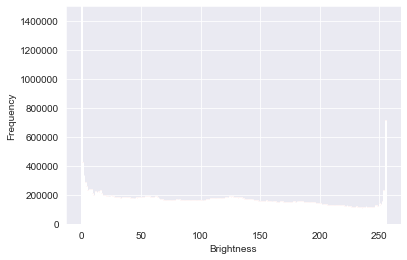

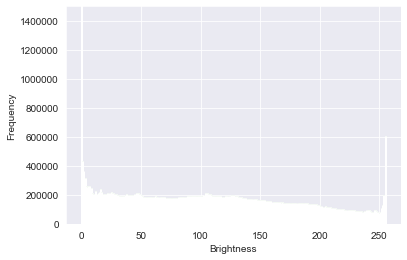

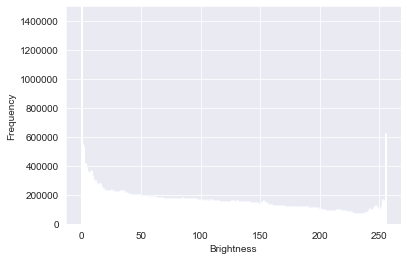

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x = range(256)

#RED
plt.bar(x,values[RED],color='red')
plt.xlabel('Brightness')
plt.ylabel('Frequency')
plt.ylim(top=1500000)
plt.show()
#GREEN
plt.bar(x,values[GREEN],color='green')
plt.xlabel('Brightness')
plt.ylabel('Frequency')
plt.ylim(top=1500000)
plt.show()
#BLUE
plt.bar(x,values[BLUE],color='blue')
plt.xlabel('Brightness')
plt.ylabel('Frequency')
plt.ylim(top=1500000)
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

sns .set_style ('darkgrid')  
sns .distplot(x, kde=false)

NameError: name 'false' is not defined